In [2]:
import numpy as np
import pandas as pd

Seed_data=pd.read_csv('./seeds_dataset.csv')
Seed_data.columns=['area','perimeter','compactness',' lengthofkernel','widthofkernel','asymmetrycoefficient','lengthofkernelgroove','selector']
Seed_data.head()


,area,perimeter,compactness,lengthofkernel,widthofkernel,asymmetrycoefficient,lengthofkernelgroove,selector
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
1,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
2,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
3,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
4,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1


In [3]:
from sklearn.preprocessing import LabelEncoder
feature_columns = ['area','perimeter','compactness',' lengthofkernel','widthofkernel','asymmetrycoefficient','lengthofkernelgroove']
X_seed=Seed_data[feature_columns].values
y=Seed_data['selector'].values
le = LabelEncoder()
y_seed = le.fit_transform(y)

In [24]:
# K=7
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_seed, y_seed, test_size=0.20)
# Instantiate learning model (k = 7)
classifier_seed = KNeighborsClassifier(n_neighbors=7)

# Fitting the model
classifier_seed.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier_seed.predict(X_test)

In [25]:
from sklearn.metrics import classification_report
print("Confusion Matrix\n",confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Confusion Matrix
 [[10  0  2]
 [ 1 14  0]
 [ 0  0 15]]
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        12
           1       1.00      0.93      0.97        15
           2       0.88      1.00      0.94        15

    accuracy                           0.93        42
   macro avg       0.93      0.92      0.92        42
weighted avg       0.93      0.93      0.93        42



In [6]:
# K=5
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_seed, y_seed, test_size=0.20)
# Instantiate learning model (k = 5)
classifier_acce = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
classifier_acce.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier_acce.predict(X_test)

In [7]:
print("Confusion Matrix\n",confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Confusion Matrix
 [[11  1  1]
 [ 0 15  0]
 [ 0  0 14]]
              precision    recall  f1-score   support

           0       1.00      0.85      0.92        13
           1       0.94      1.00      0.97        15
           2       0.93      1.00      0.97        14

    accuracy                           0.95        42
   macro avg       0.96      0.95      0.95        42
weighted avg       0.96      0.95      0.95        42



#### Normalize

In [8]:
from sklearn import preprocessing
normalized_data = preprocessing.normalize(X_seed)
# Instantiate learning model (k = 5)
X_train_no, X_test_no, y_train_no, y_test_no = train_test_split(normalized_data, y_seed, test_size=0.20)
classifier = KNeighborsClassifier(n_neighbors=5)

# Fitting the model
classifier.fit(X_train_no, y_train_no)

# Predicting the Test set results
y_pred = classifier.predict(X_test_no)

In [9]:
print("Confusion Matrix\n",confusion_matrix(y_test_no, y_pred))
print(classification_report(y_test_no, y_pred))

Confusion Matrix
 [[14  1  1]
 [ 1 12  0]
 [ 1  0 12]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        16
           1       0.92      0.92      0.92        13
           2       0.92      0.92      0.92        13

    accuracy                           0.90        42
   macro avg       0.91      0.91      0.91        42
weighted avg       0.90      0.90      0.90        42



#### Comparing Error rate

Text(0, 0.5, 'Mean Error')

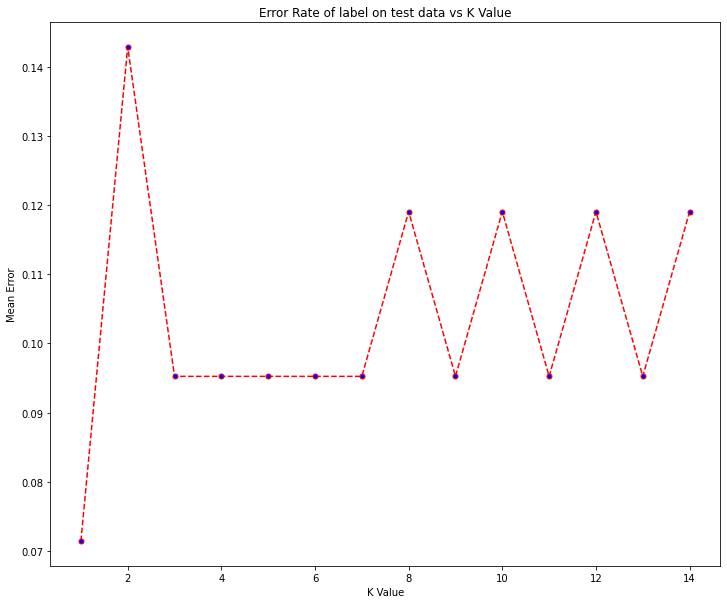

In [10]:
import matplotlib.pyplot as plt
error_acce = []
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_seed, y_seed, test_size=0.20)

# Calculating error for K values between 1 and 15
for i in range(1, 15):
    knn_classifier_seed = KNeighborsClassifier(n_neighbors=i)
    knn_classifier_seed.fit(X_train_new, y_train_new)
    y_pred = knn_classifier_seed.predict(X_test_new)
    error_acce.append(np.mean(y_pred != y_test_new))
    
plt.figure(figsize=(12, 10))
plt.plot(range(1, 15), error_acce, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=5)
plt.title('Error Rate of label on test data vs K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

#### Using PCA

In [11]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(Seed_data)
# Covarance matrix
X_covariance_matrix=np.cov(X_std.T)
X_covariance_matrix

# eignvalues eignvector
Eigenvalues, Eigenvectors = np.linalg.eig(X_covariance_matrix)
print('Eigenvalues %s \n' %Eigenvalues)
print('Eigenvectors \n%s\n' %Eigenvectors)

Eigenvalues [5.21362919e+00 1.70454412e+00 6.81711513e-01 3.72033950e-01
 4.51466311e-02 6.92210972e-04 5.35487918e-03 1.53490369e-02] 

Eigenvectors 
[[-0.43541535 -0.0808739   0.02721885 -0.01068086  0.26233477  0.73267236
   0.42798899 -0.11922685]
 [-0.43156485 -0.11775917 -0.0617752   0.06414472  0.30543518 -0.6747512
   0.4748507  -0.13375655]
 [-0.28701531  0.3615505   0.65547056 -0.37878591 -0.33023464 -0.08009625
   0.14251995  0.27928617]
 [-0.4109366  -0.20258352 -0.21994191  0.17328634  0.05504723  0.01177558
  -0.26982282  0.79731751]
 [-0.42822571  0.03018611  0.22414208 -0.09134082  0.32706728 -0.03037504
  -0.70409807 -0.39176394]
 [ 0.13955398 -0.55476986  0.64447358  0.50665649 -0.01728947  0.00115038
   0.01918635  0.0063034 ]
 [-0.36493476 -0.38113627 -0.224793   -0.05133778 -0.75960108 -0.00122744
  -0.04582033 -0.29882352]
 [ 0.19206409 -0.5948846   0.03618154 -0.7447046   0.20381111 -0.02055456
   0.00205829  0.10660183]]



In [12]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(Eigenvalues[i]), Eigenvectors[:,i]) for i in range(len(Eigenvalues))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
5.213629193638244
1.7045441240596015
0.6817115125203284
0.3720339500638315
0.045146631095873475
0.015349036930915603
0.00535487918084452
0.0006922109719018725


In [13]:
W_matrix = np.hstack((eig_pairs[0][1].reshape(8,1),
                      eig_pairs[1][1].reshape(8,1)))
W_matrix

array([[-0.43541535, -0.0808739 ],
       [-0.43156485, -0.11775917],
       [-0.28701531,  0.3615505 ],
       [-0.4109366 , -0.20258352],
       [-0.42822571,  0.03018611],
       [ 0.13955398, -0.55476986],
       [-0.36493476, -0.38113627],
       [ 0.19206409, -0.5948846 ]])

In [14]:
Y_seed= X_std.dot(W_matrix)
Y_seed[0:5]

array([[-0.2983016 ,  2.27121283],
       [ 0.15146837,  2.29712372],
       [ 0.27946559,  2.34430715],
       [-1.38397001,  2.21573759],
       [ 0.0394514 ,  2.07290297]])

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Y_seed,y_seed, test_size=0.20)
# Instantiate learning model (k = 5)
classifier_acce_pca = KNeighborsClassifier(n_neighbors=5)

# Fitting the model
classifier_acce_pca.fit(X_train, y_train)

# Predicting the Test set results
# Predicting the Test set results
y_pred = classifier_acce_pca.predict(X_test)

In [16]:
from sklearn.metrics import classification_report
print("Confusion Matrix\n",confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Confusion Matrix
 [[10  1  0]
 [ 0 13  0]
 [ 0  0 18]]
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.93      1.00      0.96        13
           2       1.00      1.00      1.00        18

    accuracy                           0.98        42
   macro avg       0.98      0.97      0.97        42
weighted avg       0.98      0.98      0.98        42



#### K cross

In [17]:
# creating list of K for KNN
list_neighbors = list(range(1,10,2))
# creating list of cv scores
cross_scores = []
X_train, X_test, y_train, y_test = train_test_split(X_seed, y_seed, test_size=0.20)
# perform 10-fold cross validation
for k in list_neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cross_scores.append(scores.mean())
print(cross_scores)

[0.8849264705882354, 0.8485294117647058, 0.8661764705882353, 0.8966911764705883, 0.8904411764705882]


<Figure size 432x288 with 0 Axes>

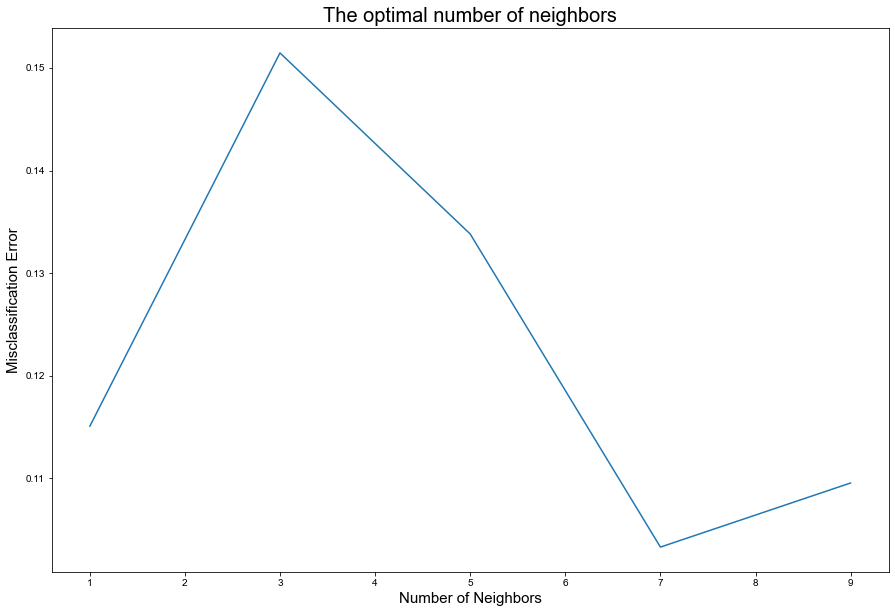

In [18]:
import seaborn as sns
# changing to misclassification error
MSE = [1 - x for x in cross_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='normal')
plt.xlabel('Number of Neighbors', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(list_neighbors, MSE)

plt.show()

In [19]:
# Instantiate learning model (k = 5)
classifier_iris_kcross = KNeighborsClassifier(n_neighbors=5)

# Fitting the model
classifier_iris_kcross.fit(X_train, y_train)

# Predicting the Test set results
# Predicting the Test set results
y_pred = classifier_iris_kcross.predict(X_test)

In [20]:
print("Confusion Matrix\n",confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Confusion Matrix
 [[13  0  3]
 [ 1 10  0]
 [ 1  0 14]]
              precision    recall  f1-score   support

           0       0.87      0.81      0.84        16
           1       1.00      0.91      0.95        11
           2       0.82      0.93      0.87        15

    accuracy                           0.88        42
   macro avg       0.90      0.88      0.89        42
weighted avg       0.89      0.88      0.88        42



#### leave one out

In [21]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder

X_train_lou, X_test_lou, y_train_lou, y_test_lou = train_test_split(X_seed, y_seed, test_size=0.20)
lda = LinearDiscriminantAnalysis()
cv_loo = LeaveOneOut()
scores = cross_val_score(lda, X_train_lou, y_train_lou, cv=cv_loo)
scores.mean() 

0.9520958083832335

No handles with labels found to put in legend.


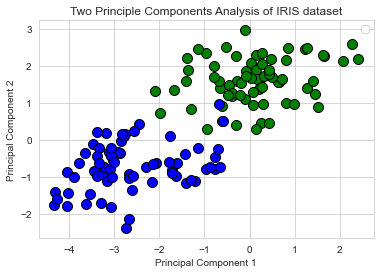

In [23]:
from matplotlib import pyplot as plt
for c, i, target_name in zip("rgb", [0, 1, 2], X_seed):
    plt.scatter(Y_seed[y==i,0], Y_seed[y==i,1], c=c,s=100, edgecolor="k")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('Two Principle Components Analysis of IRIS dataset')
plt.show()